# Random Forest - Regression - Part 2

În această parte a doua o să ne uităm peste algoritmii de Machine Learning care au mai rămas pentru partea de Regression, și anume KNearestNeighnors, Support Vector Machines și Random Forest.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('../data/DATA/rock_density_xray.csv')

In [7]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [8]:
df.rename(columns={'Rebound Signal Strength nHz': 'signal', 'Rock Density kg/m3':  'density'}, inplace=True)

In [9]:
df.head()

,signal,density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


<AxesSubplot:xlabel='signal', ylabel='density'>

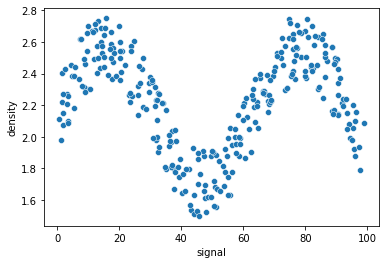

In [10]:
sns.scatterplot(data=df, x='signal', y='density')

In [11]:
X = df['signal'].values.reshape(-1, 1)
y = df['density']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [15]:
def run_model(model):
    
    # Fit the model
    model.fit(X_train, y_train)

    # Calculate metrics
    y_preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_preds)
    rmse = np.sqrt(mean_squared_error(y_test, y_preds))

    print(f'MAE = {mae}')
    print(f'RMSE = {rmse}')

    # plot
    sample_data = np.arange(0, 100)
    sample_preds = model.predict(sample_data.reshape(-1, 1))

    plt.figure(figsize=(7,8), dpi=200)
    sns.scatterplot(x='signal', y='density', data=df)
    plt.plot(range(0, 100), sample_preds)

O să începem să verificăm acuma cum se descurcă un model de KNN pentru acest set de date

MAE = 0.12198383614100558
RMSE = 0.13730685016923647


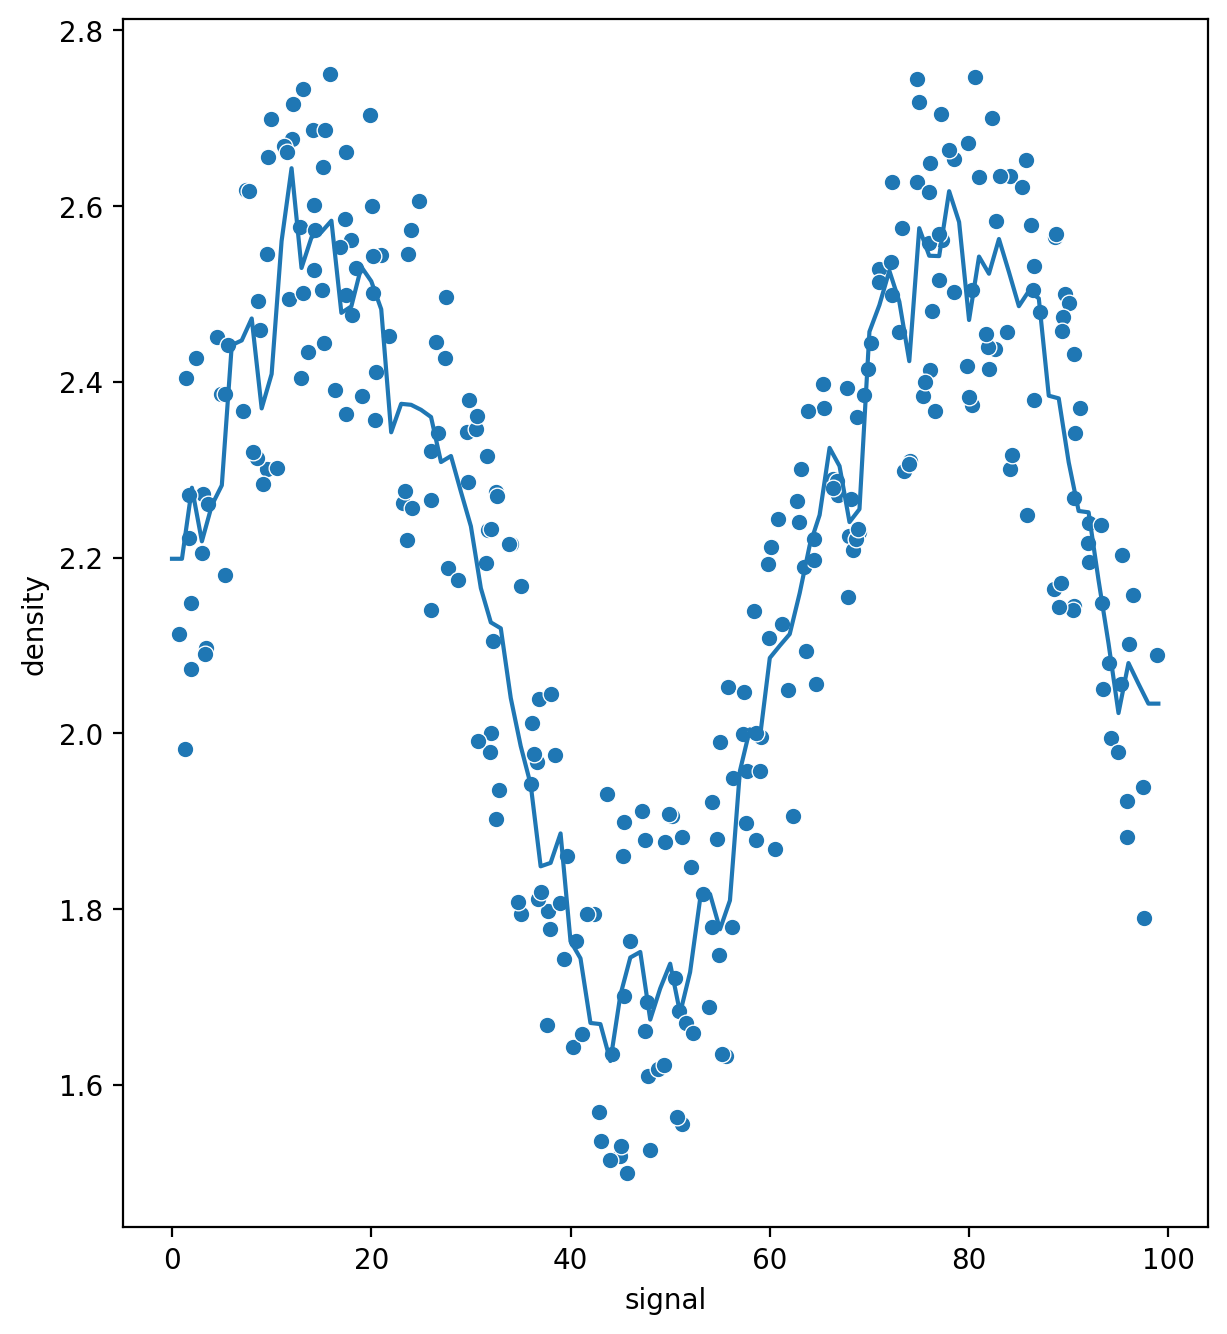

In [16]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()

run_model(knn_model)

Ceea ce avem mai sus este un model de KNN cu valorile default pentru toți parametrii. Valoarea care ne interesează este cea de n_estimators (care momentan este setată la 5 default). Putem să creem un for loop prin care să vedem mai multe valori pentru acest tip de model la acest set de date. O să alegem valorile 1, 5 și 10

MAE = 0.11877297474442378
RMSE = 0.1523487028635337
MAE = 0.12198383614100558
RMSE = 0.13730685016923647
MAE = 0.11635971693292672
RMSE = 0.13277855732740926


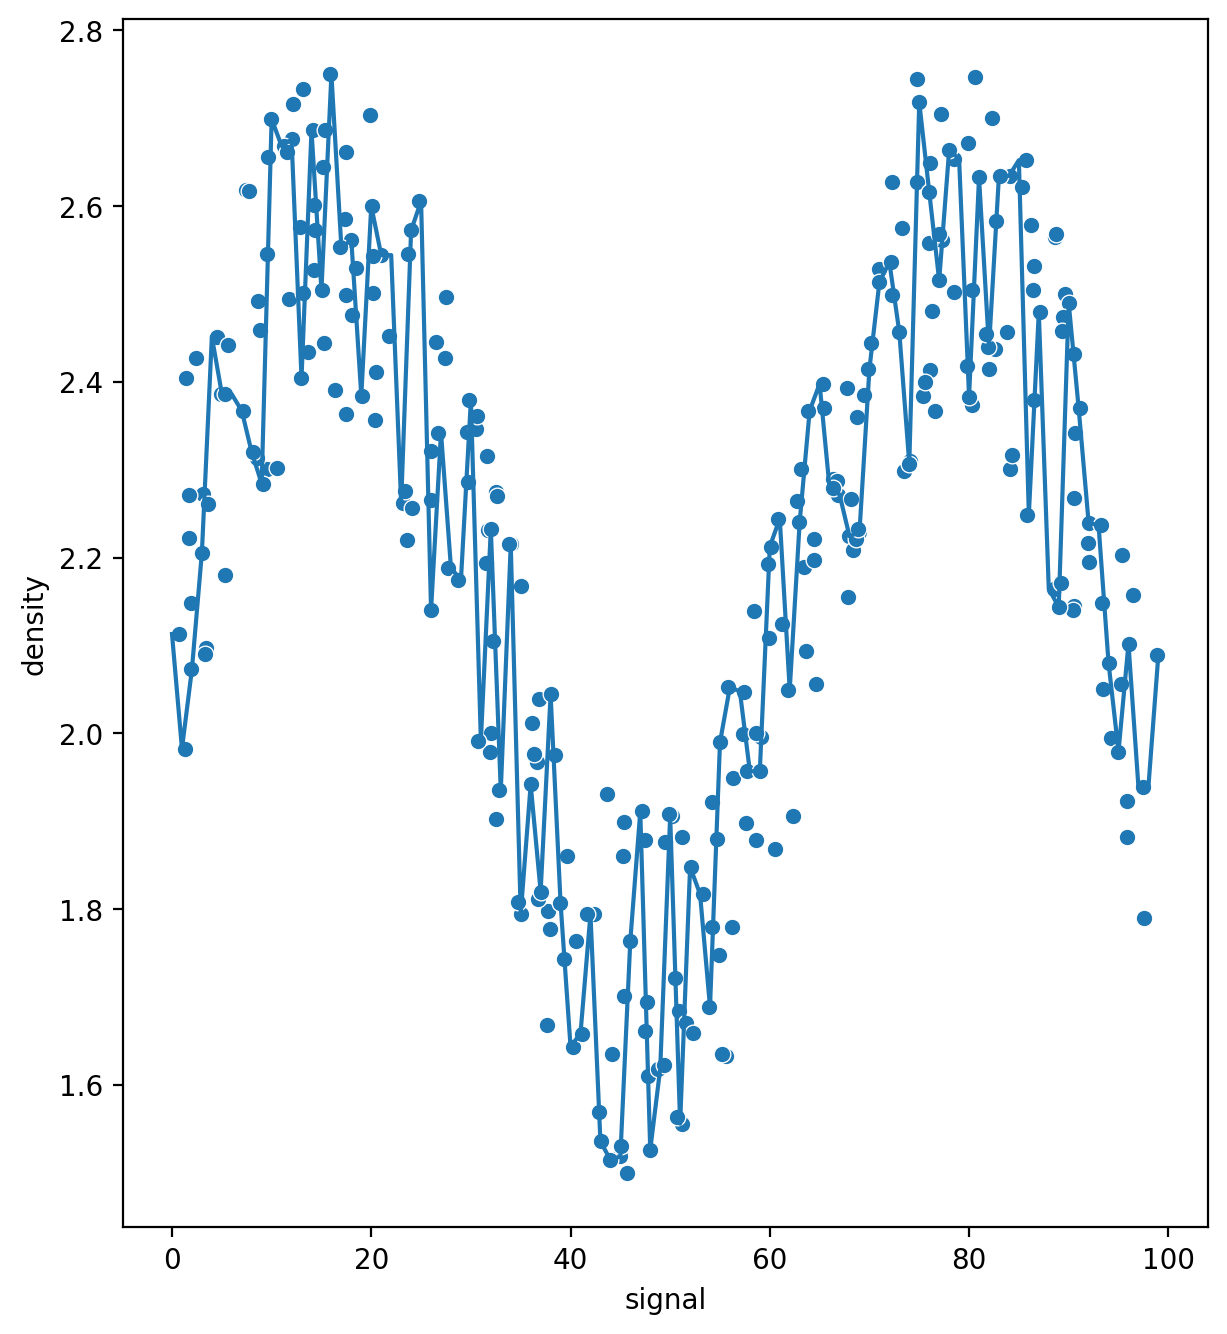

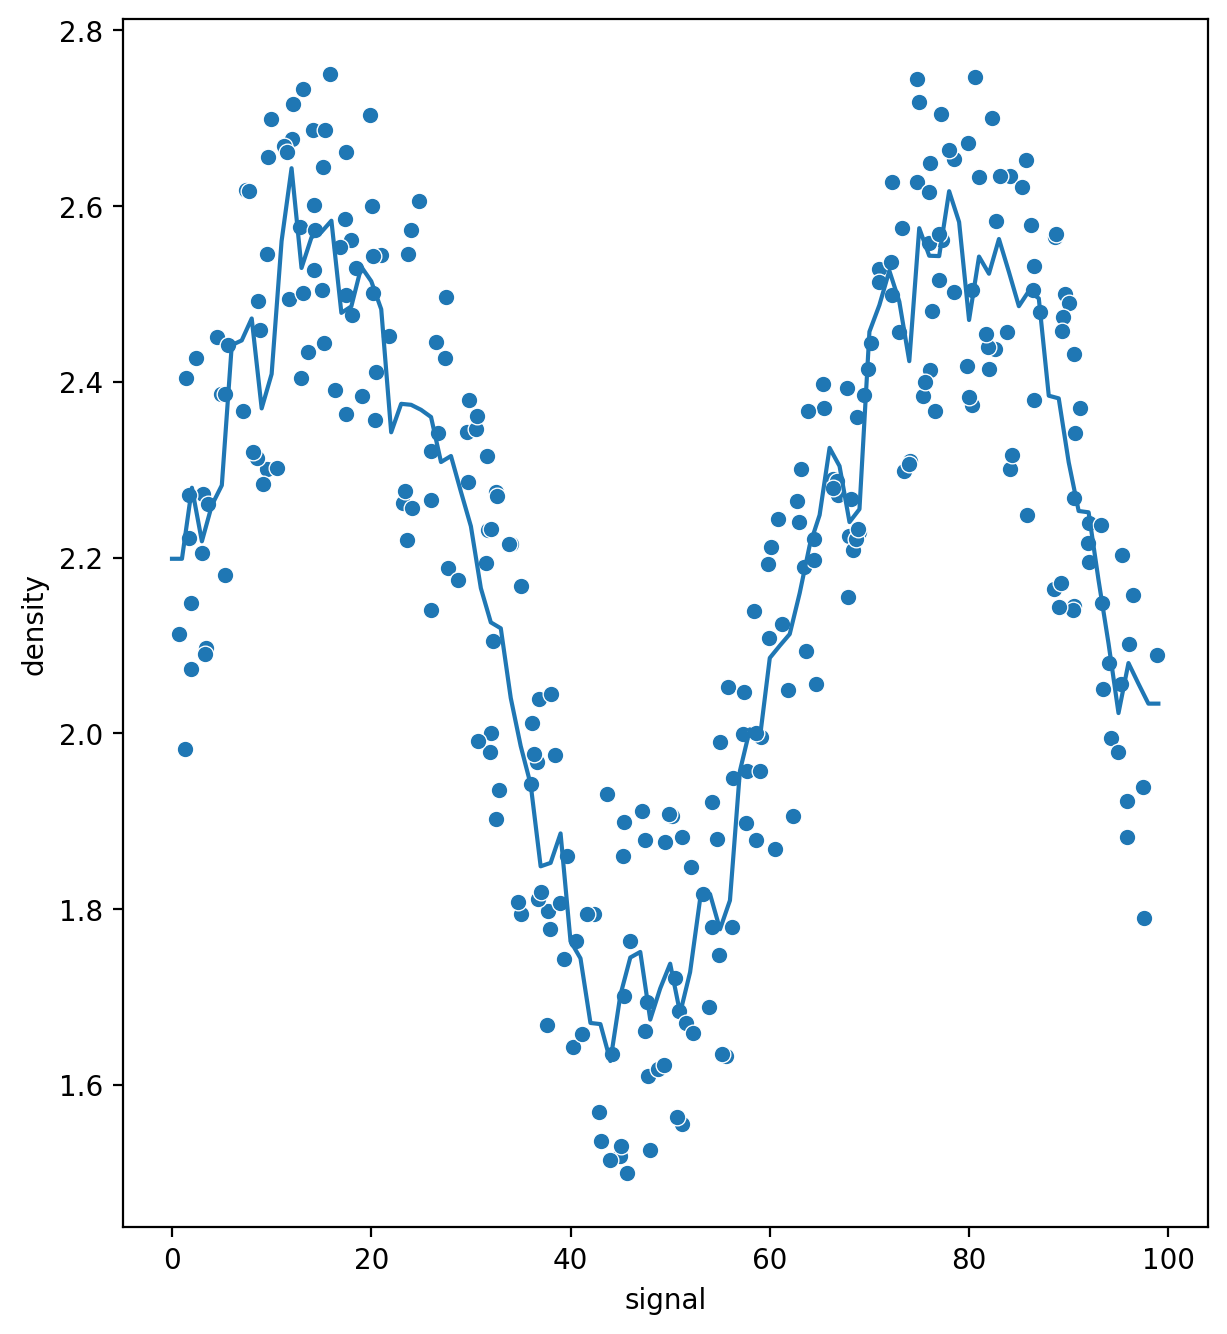

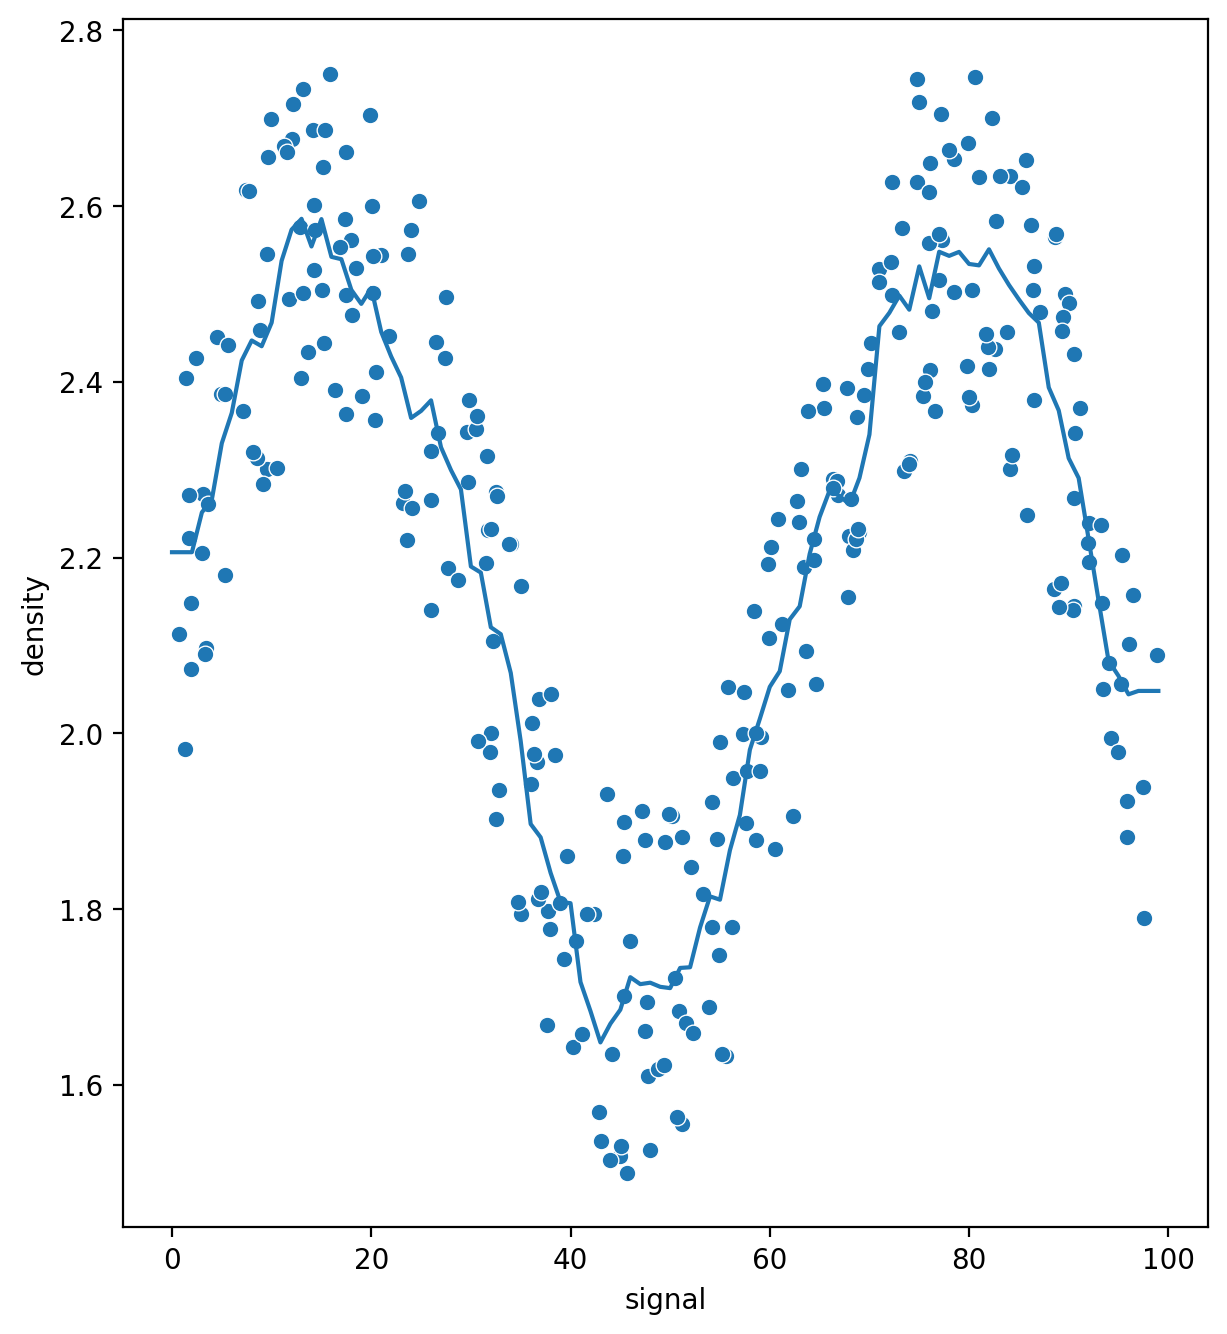

In [17]:
k_values = [1, 5, 10]

for n in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=n)
    run_model(knn_model)

Din datele și graficele de mai sus observăm faptul că atuni când avem un singur neighnor pe baza căruia construim acest model, datele prind foarte mult noise la partea de antrenare. Cu cât creștem valoarea pentru acel hyperparametru, linia din grafic pare să devină una cât mai potrivită.

Putem să rulăm aceeași analiză și pentru un model de Decision Tree pentru a vedea performanța acestuia.

In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
tree_model = DecisionTreeRegressor()

MAE = 0.11877297474442378
RMSE = 0.1523487028635337


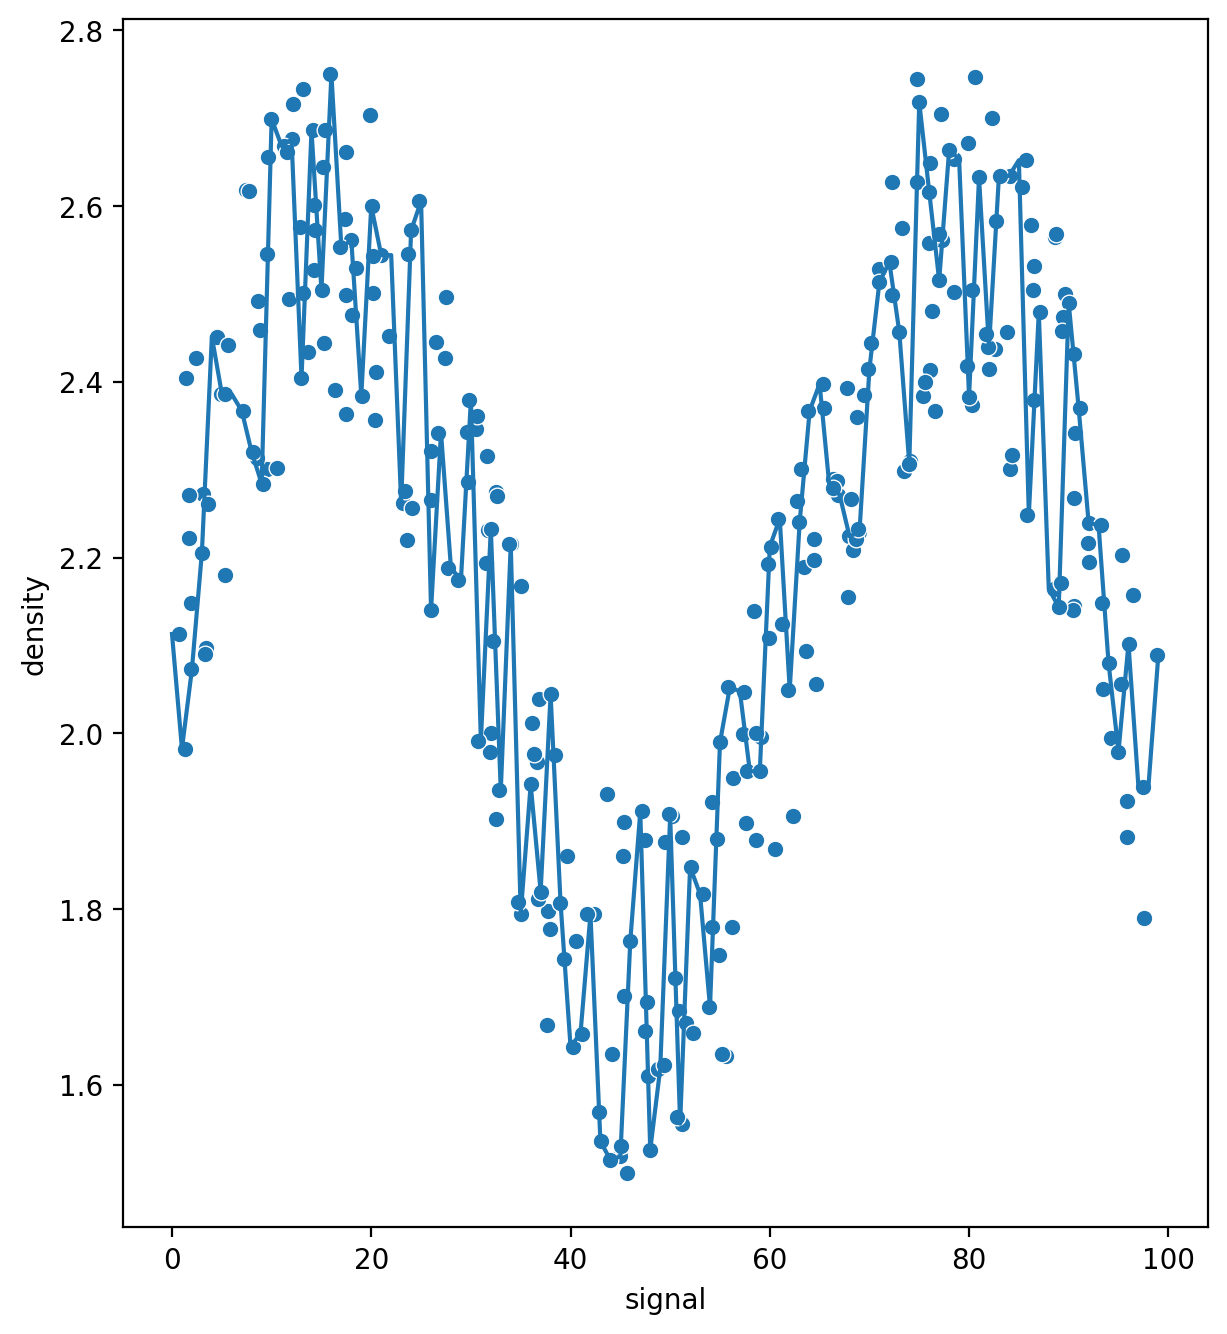

In [20]:
run_model(tree_model)

Pentru un model de DecisionTreeRegressor putem observa faptul că acesta preia extrem de mult noise pentru acest set de date. Urmează modelul de Support Vector Regressor. Acest model este unul mai dificil puțin de verificat din cauza faptului că acesta are acei hyperparametrii C și gamma pe care trebuie să îi verificăm, de aceea trebuie să rulăm un GridSearchCV pentru acest fel de model.

In [21]:
from sklearn.svm import SVR

In [22]:
from sklearn.model_selection import GridSearchCV

In [24]:
svr_model = SVR()

param_grid = {'C': [0.01, 0.1, 1, 5, 10, 100, 1000],
            'gamma': ['auto', 'scale']}

grid = GridSearchCV(svr_model, param_grid)

MAE = 0.10854210121348368
RMSE = 0.12646999302046696


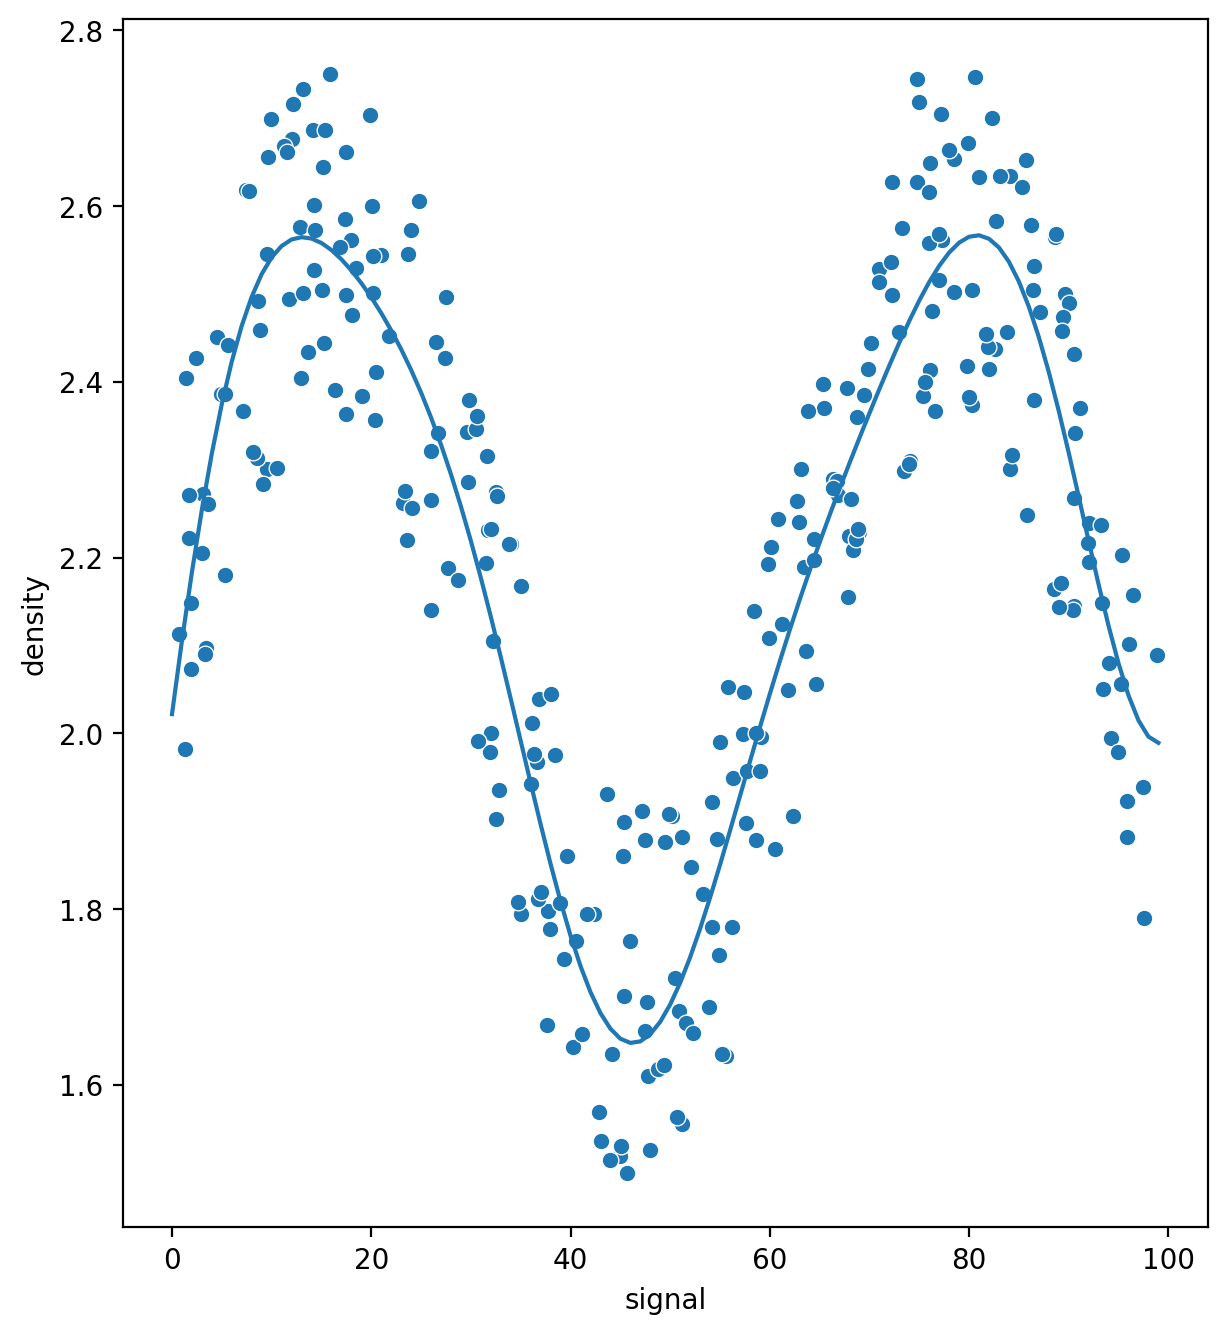

In [25]:
run_model(grid)

DUpă cum funcționează aceste modele de Support Vector Machines, încearcă să păstreze acele margini astfel încât să creeze cea mai bună linie care să se potrivească pentru aceste date și să nu ia foarte mult noise în partea de antrenare a modelului. Calitatea acestui model este una destul de bună la cum arată graficul respectiv (poate nu chiar la fel de bună ca și un model de Polynomial Regression)

Urmează partea de testare a modelului acestei secțiuni, și anume un model de RandomForest de regresie pentru a îi testa performanța.

In [26]:
from sklearn.ensemble import RandomForestRegressor

MAE = 0.1070121515666178
RMSE = 0.13384596960272044


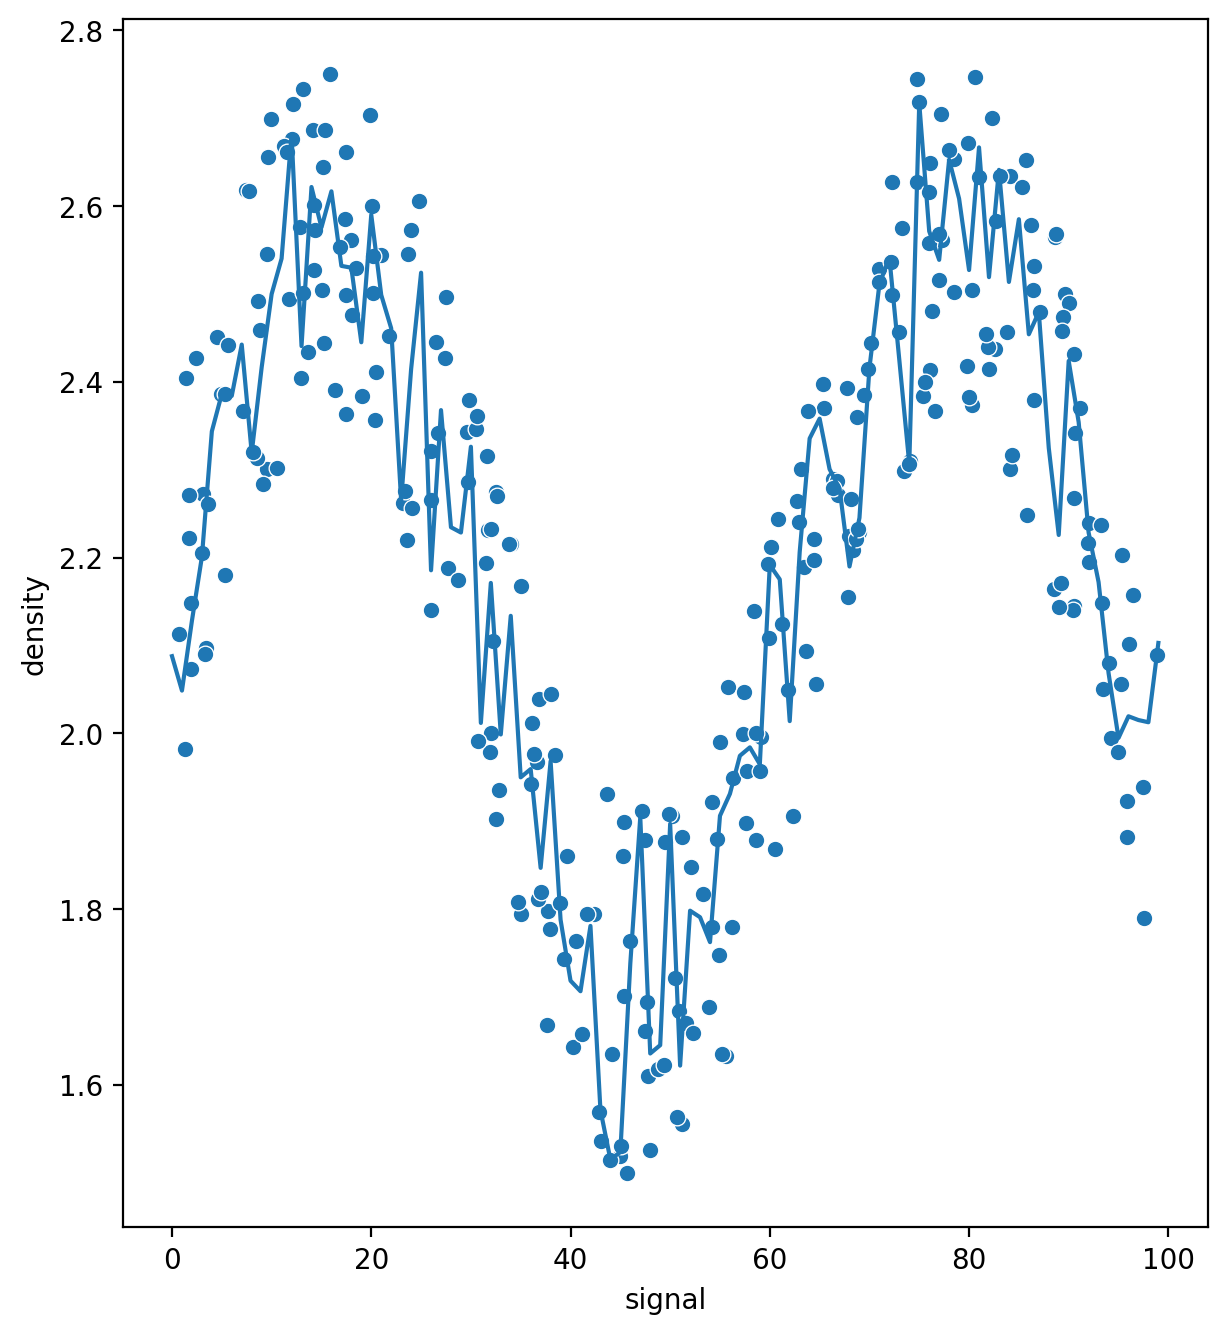

In [27]:
rfr_model = RandomForestRegressor(n_estimators=10)
run_model(rfr_model)

Modelul acesta de RandomForest seamănă destul de mult cu cel de DecisionTree, iar acest lucru se datorează faptului că avem doar un Feature pentru acest set de date pentru care să creem acest Tree, iar prin urmare nu avem de unde să selectăm acel subset de features

## Recapitulare

    În cadrul acestei secțiuni doar am recapitulat mai multe modele de Regression, cum ar fi KNeighborsRegressor, DecisionTreeRegressor, SVR și RandomForestRegressor